In [1]:
#Import pandas
import pandas as pd
#Load the iris dataset as a DataFrame
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')

In [2]:
#Inspect the dimensions and first few rows
iris.shape

(150, 6)

In [3]:
iris.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [4]:
#Drop column id
iris.drop('id', axis=1, inplace=True)
iris.head()

,sepal_len,sepal_wd,petal_len,petal_wd,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [5]:
#Check summary statistics
iris.describe()

,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#Check class distribution
iris.groupby('species').size()

species
iris-setosa        50
iris-versicolor    50
iris-virginica     50
dtype: int64

In [7]:
iris['species'].value_counts()

iris-virginica     50
iris-versicolor    50
iris-setosa        50
Name: species, dtype: int64

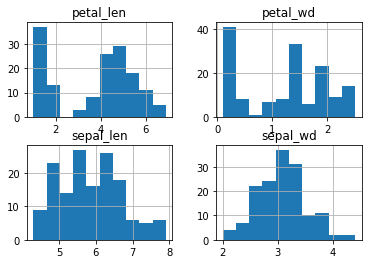

In [8]:
#Univariate plot for each attribute
#Import matplotlib.pyplot
import matplotlib.pyplot as plt
iris.hist()
plt.savefig("plot.png")
plt.show()

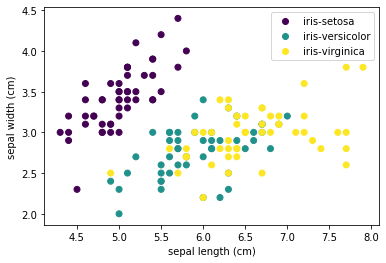

In [9]:
#Multivariate plot to see interactions between attributes using scatter plots
#Import numpy
import numpy as np
#build a dict mapping species to an integer code
inv_name_dict = {'iris-setosa': 0, 'iris-versicolor': 1, 'iris-virginica': 2}
#build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['species']]

#scatter plot using sepal_length and sepal_width features
scatter = plt.scatter(iris['sepal_len'], iris['sepal_wd'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

#add legend
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.savefig('plot.png')
plt.show()

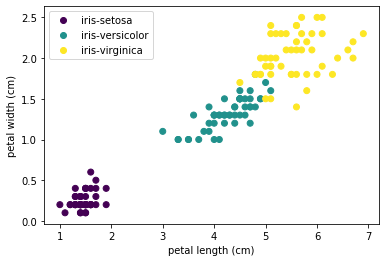

In [10]:
#scatter plot using petal_length and petal_width features
scatter = plt.scatter(iris['petal_len'], iris['petal_wd'], c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

#add legend
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.savefig('plot.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BFA2F8E5C8>,
      dtype=object)

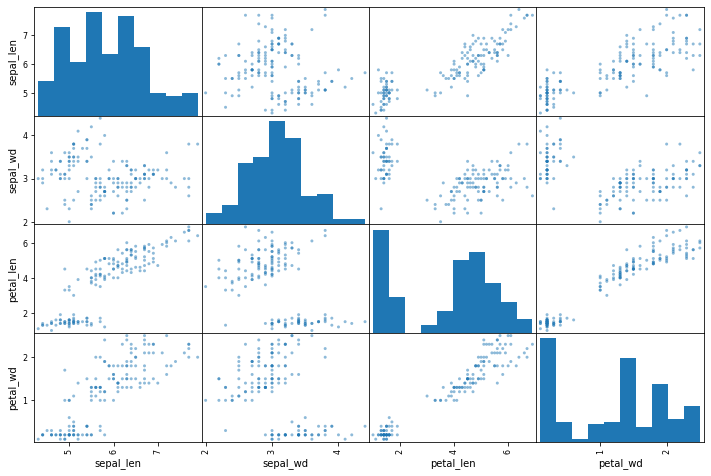

In [11]:
#Scatter plots of all pairs of features
pd.plotting.scatter_matrix(iris, figsize = (12, 8))

In [12]:
#Supervised learning problems are grouped into regression and classification problems
#Both problems have as a goal the construction of a mapping function from input variables (X) to an output variable (y)
#The difference is that the output variable is continuous in regression and categorical for classification
#Prepare data based on EDA
X = iris[['petal_len', 'petal_wd']]
y = iris['species']

In [13]:
#Segregate data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
#70% of the data is for training and 30% for testing
#The split has been specified to be stratified by label (y) to ensure that the distribution of labels remains similar in both
#train and test sets
y_train.value_counts()

iris-virginica     35
iris-versicolor    35
iris-setosa        35
Name: species, dtype: int64

In [14]:
y_test.value_counts()

iris-virginica     15
iris-versicolor    15
iris-setosa        15
Name: species, dtype: int64

In [15]:
#K nearest neighbors algorithm is implemented in sklearn.neighbors module in scikit-learn
#Build and train the model
from sklearn.neighbors import KNeighborsClassifier
#create an instance from the class KNeighborsClassifier while setting the hyperparameter by random choice
knn = KNeighborsClassifier(n_neighbors=5)
#Mostly default values are used for parameters, e.g., metric = 'minkowski' and p = 2 together defines that the distance
#is euclidean distance
#fit
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
#Predict the species of iris
pred = knn.predict(X_test)

In [17]:
#Review the first five predictions
pred[:5]

array(['iris-virginica', 'iris-setosa', 'iris-setosa', 'iris-versicolor',
       'iris-versicolor'], dtype=object)

In [18]:
#There is an additional method 'predict_proba' of all classification algorithms implemented in scikit-learn
#It outputs the probability for the target in array form
#In classification tasks, soft prediction returns the predicted probabilities of data points belonging to each of the clases
#while hard prediction outputs the labels only
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [19]:
#The probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0
#For the next flower, there is 20% chance it would be classified iris-versicolor, 80% chance iris-virginica
#It tells of the five nearest neighbors of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 iris-virginca
pred[10:12]

array(['iris-setosa', 'iris-virginica'], dtype=object)

In [20]:
#Evaluate model by the accuracy metric
(pred == y_test.values).sum() 

44

In [21]:
y_test.size

45

In [22]:
(pred == y_test.values).sum()/y_test.size

0.9777777777777777

In [23]:
#Same as the accuracy metric
knn.score(X_test, y_test)

0.9777777777777777

In [24]:
#Import accuracy_score function
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9777777777777777

In [25]:
#Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are
#more than two classes in the dataset
#Hence, confusion matrix - it is a summary of the counts of correct and incorrect predictions, broken down by each class
#Import confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred, labels = ['iris-setosa', 'iris-versicolor', 'iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

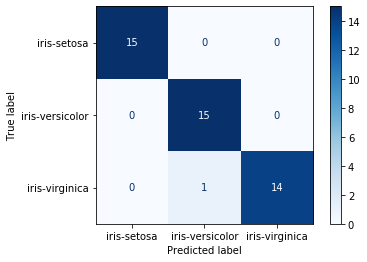

In [26]:
#Visualize the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig("plot.png")
plt.show()

In [27]:
#Making a train-test-split before fitting the model so that model performance can be reported on the test data, is a simple
#kind of cross validation technique also known as the holdout method
#The split is random, and model performance can be sensitive to how the data is split
#To overcome this, we use k-fold cross validation in which the data is divided into k subsets
#Then the holdout method is is repeated k times such that each time, one of the k subsets is used as the test set and the other
#k-1 subsets are combined to train the model
#The accuracy is averaged over k trials to provide total effectiveness of the model thereby using all data points and
#there are more metrics so as to not rely on one test data for model performance evaluation
#K-fold cross validation in scikit-learn
from sklearn.model_selection import cross_val_score
#create a new knn model (3nn model in this case)
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#Output each cv score (accuracy)
cv_scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [28]:
#average cv scores
cv_scores.mean()

0.9533333333333334

In [29]:
#The 3nn model has an accuracy of 95.33% based on a 5-fold cross validation
#As a general rule, 5-fold or 10-fold cross validation is preferred
#As k gets larger, the difference in size between the training set and the resampling subsets gest smaller
#As this difference decreases, the bias of the technique becomes smaller

In [30]:
#Grid search (GridSearchCV)
#In a knn model, finding the optimal k is called tuning the hyperparameter
#GridSearchCV trains the model multiple times on a range of values specified with the param_grid parameter and computes cross
#validation score, and which of the values for the tested hyperparameter performed the best can be checked
from sklearn.model_selection import GridSearchCV
#create a new knn model
knn2 = KNeighborsClassifier()
#create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)
#fit model to data
knn_gscv.fit(X, y)
#check the top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [31]:
#4 is the best value for n_neighbors
#check accuracy of model when k is 4
knn_gscv.best_score_

0.9666666666666668

In [32]:
#build the final model
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)
pred = knn_final.predict(X)
knn_final.score(X, y)

0.9733333333333334

In [33]:
#It can be reported that the final model, 4nn, has an accuracy of 97.3% in predicting the species of iris
#The techniques of k-fold cross validation and tuning parameters with grid search is applicable to both classification and
#regression problems

In [34]:
#Deploy the model 'knn_final'
new_data = np.array([3.76, 1.20])
#model expects a 2D array
new_data = new_data.reshape(1, -1)
#predict label
knn_final.predict(new_data)

array(['iris-versicolor'], dtype=object)

In [35]:
#model takes 2D list as well
knn_final.predict([[3.76, 1.20]])

array(['iris-versicolor'], dtype=object)

In [36]:
#predict probability with new data
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
knn_final.predict(new_data)

array(['iris-versicolor', 'iris-virginica', 'iris-setosa'], dtype=object)

In [37]:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])